<a href="https://colab.research.google.com/github/shivanalyst/Employee-Access-Challenge/blob/main/Employee_Access_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon.com - Employee Access Challenge

# Importing all the libraries. 
lazy_imports(): It is a feature of the Pyforest module that allows the user to perform the task without adding libraries to the code snippet as the task of this function is to add those libraries themselves into the code snippet. 

In [ ]:
from pyforest import*
lazy_imports()

['from dask import dataframe as dd',
 'import plotly.express as px',
 'import tensorflow as tf',
 'import spacy',
 'import re',
 'import os',
 'from sklearn import svm',
 'import pickle',
 'from pyspark import SparkContext',
 'import glob',
 'import altair as alt',
 'import tqdm',
 'from sklearn.ensemble import RandomForestRegressor',
 'import plotly as py',
 'import sklearn',
 'import nltk',
 'from sklearn.model_selection import train_test_split',
 'from pathlib import Path',
 'from sklearn.manifold import TSNE',
 'import bokeh',
 'from openpyxl import load_workbook',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import sys',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import datetime as dt',
 'import keras',
 'import statistics',
 'import plotly.graph_objs as go',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import gensim',
 'import dash',
 'import pydot',
 'import matplotlib as 

In [ ]:
train=pd.read_csv("amazontrain.csv")

<IPython.core.display.Javascript object>

In [ ]:
test=pd.read_csv("amazontest.csv")

<IPython.core.display.Javascript object>

In [ ]:
train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [ ]:
train.shape

(32769, 10)

In [ ]:
test.shape

(58921, 10)

In [ ]:
test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


<br>
<br>

# **CatBoost**



CatBoost is an algorithm for gradient boosting on decision trees. It is developed by Yandex researchers and engineers, and is used for search, recommendation systems, personal assistant, self-driving cars, weather prediction and many other tasks at Yandex and in other companies, including CERN, Cloudflare, Careem taxi. It is in open-source and can be used by anyone.


Procedure for other gradient boosting algorithms (XG boost, Light GBM)
Step 1: Consider all (or a sample ) the data points to train a highly biased model.

Step 2: Calculate residuals (errors) for each data point.

Step 3: Train another model with the same data points and corresponding residuals (errors) as class labels.

Step 4: Repeat Step 2 & Step 3 ( for n iterations).

This procedure is prone to overfitting, because we are calculating residuals of each data point by using the model that has already been trained on same set of data points.

<br>

**Advantages of CatBoost Library**

**Handling Categorical features automatically:**

We can use CatBoost without any explicit pre-processing to convert categories into numbers. CatBoost converts categorical values into numbers using various statistics on combinations of categorical features and combinations of categorical and numerical features. You can read more about it here.

*Reference for Gradient Boosting* : https://bit.ly/2LOJQYD

In [ ]:
!pip install catboost

In [ ]:
# Loading data directly from CatBoost
from catboost.datasets import amazon

traindf, testdf = amazon()

In [ ]:
traindf.shape

In [ ]:
testdf.shape

In [ ]:
traindf.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


<br>

**ACTION** is our target column

<br>

In [ ]:
testdf.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [ ]:
traindf.apply(lambda x: len(x.unique()))

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

In [ ]:
traindf['MGR_ID'].value_counts()

770       152
2270       99
2594       82
1350       71
2014       67
16850      66
3966       64
7807       64
5244       62
5396       62
3526       62
4659       61
7411       61
54618      61
18686      60
7578       58
7389       58
3281       57
70062      57
18213      57
6982       56
1475       56
71189      55
85475      55
1334       54
3838       54
46254      54
1903       53
1755       53
7553       53
         ... 
50605       1
93720       1
55662       1
53519       1
28225       1
6358        1
20421       1
3285        1
17628       1
64779       1
6030        1
5542        1
311597      1
8047        1
5526        1
5966        1
50604       1
142801      1
7639        1
15651       1
97915       1
58648       1
44633       1
1908        1
73591       1
1940        1
8087        1
22526       1
34948       1
58677       1
Name: MGR_ID, Length: 4243, dtype: int64

## Distribution of Features

**Distplot**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

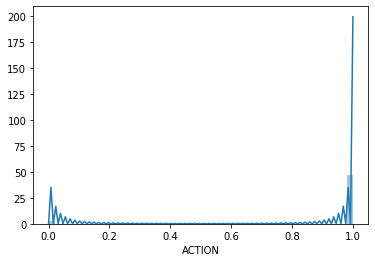

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

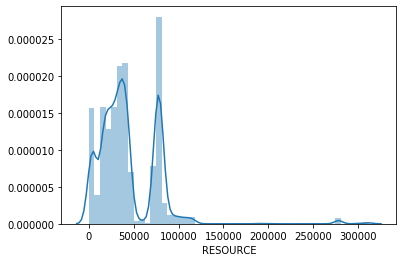

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

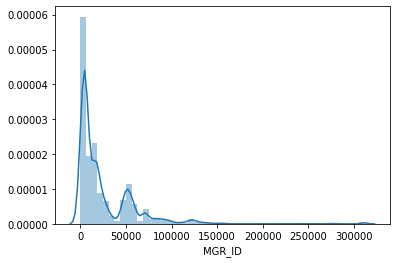

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

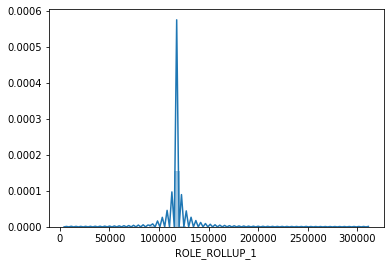

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

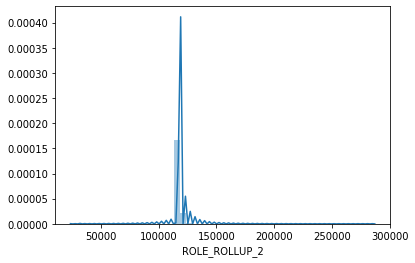

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

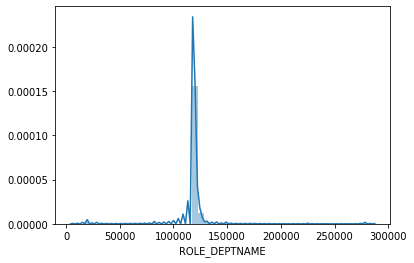

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

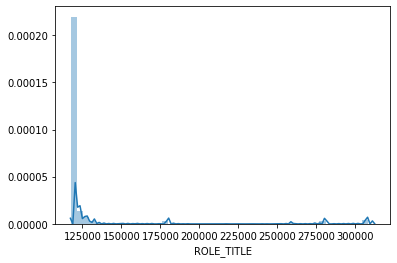

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

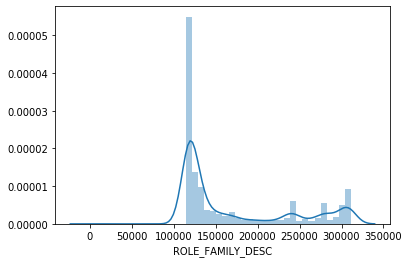

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

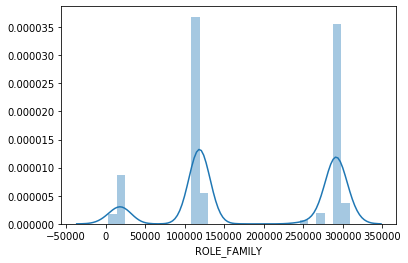

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

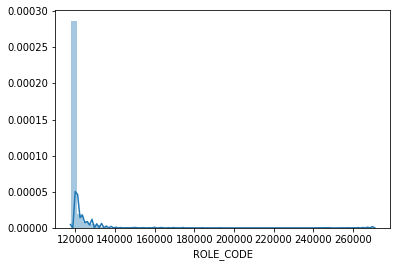

In [ ]:
for i in traindf.describe().columns:
    sns.distplot(traindf[i].dropna())
    plt.show()

<br>

**Boxplot**

In [ ]:
traindf['ACTION'].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

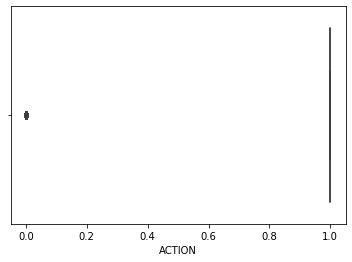

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

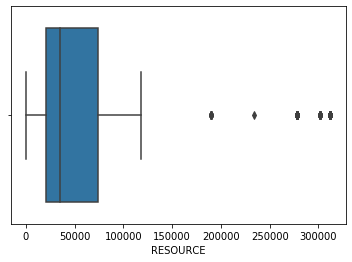

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

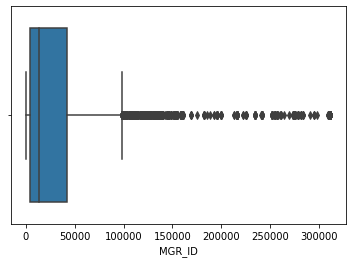

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

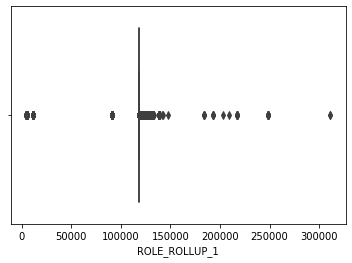

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

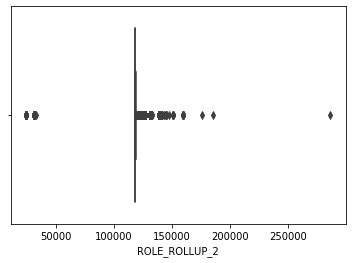

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

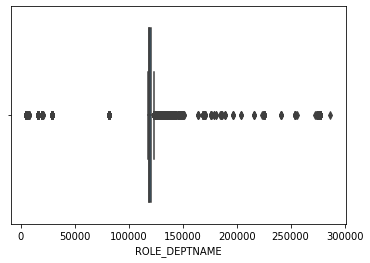

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

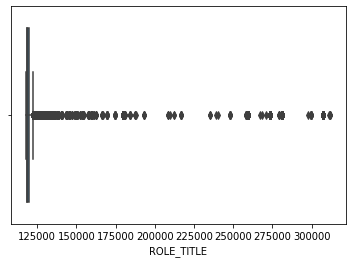

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

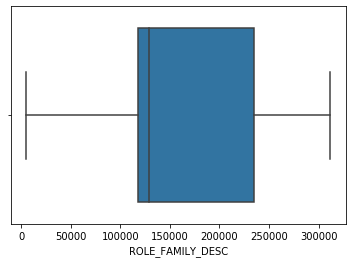

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

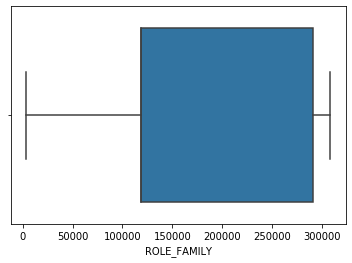

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

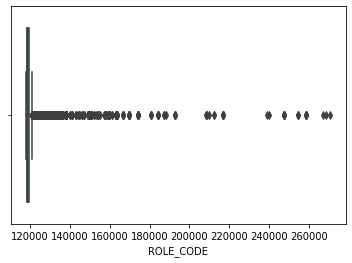

In [ ]:
for i in traindf.describe().columns:
    sns.boxplot(traindf[i].dropna())
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

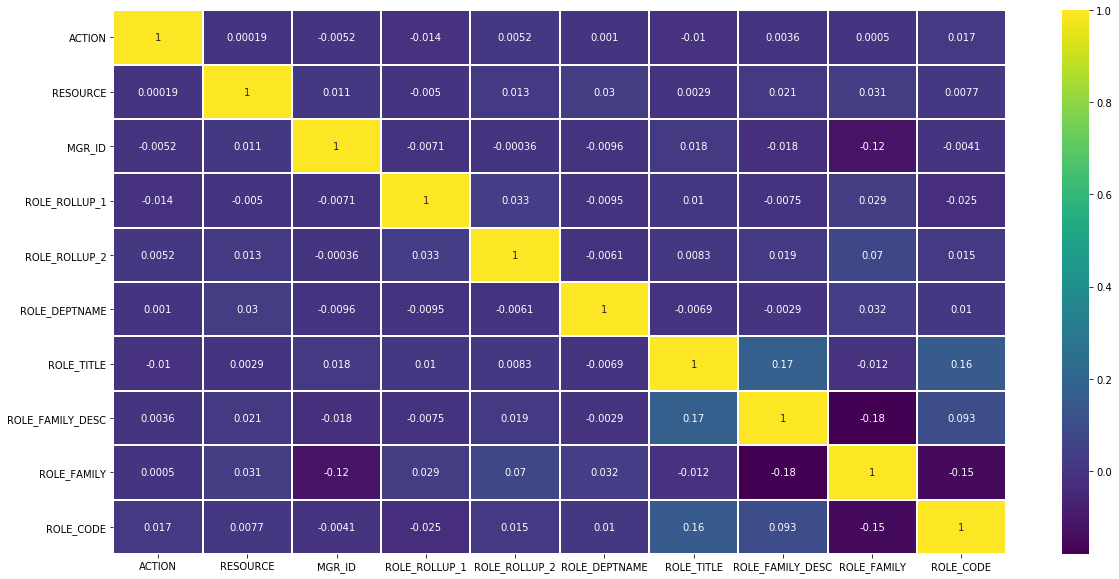

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(traindf.corr(),annot=True,cmap='viridis',linewidth=1)

In [ ]:
traindf.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [ ]:
testdf.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


# Model Building

In [ ]:
y = traindf['ACTION']

X = traindf.drop('ACTION',axis=1) 

X_test = testdf.drop('id',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
%%time

params = {'loss_function':'Logloss', # objective function
          'eval_metric':'AUC', # metric
          'verbose': 200, # output to stdout info about training process every 200 iterations
          'random_seed': 1
         }
catmodel_1 = CatBoostClassifier(**params)
catmodel_1.fit(X_train, y_train, # data to train on (required parameters, unless we provide X as a pool object, will be shown below)
          eval_set=(X_valid, y_valid), # data to validate on
          use_best_model=True, # True if we don't want to save trees created after iteration with the best validation score
         );

Learning rate set to 0.069882
0:	test: 0.5400959	best: 0.5400959 (0)	total: 100ms	remaining: 1m 40s
200:	test: 0.8016667	best: 0.8017826 (196)	total: 4.98s	remaining: 19.8s
400:	test: 0.8234442	best: 0.8234442 (400)	total: 8.81s	remaining: 13.2s
600:	test: 0.8323016	best: 0.8323806 (596)	total: 15.4s	remaining: 10.2s
800:	test: 0.8358278	best: 0.8361184 (795)	total: 21.4s	remaining: 5.33s
999:	test: 0.8391131	best: 0.8393621 (997)	total: 26.7s	remaining: 0us

bestTest = 0.8393620826
bestIteration = 997

Shrink model to first 998 iterations.
CPU times: user 48.7 s, sys: 8.9 s, total: 57.6 s
Wall time: 28.4 s


In [ ]:
#catmodel_1.plot_tree(tree_idx=0)

# https://catboost.ai/docs/concepts/python-reference_catboostclassifier_plot_tree.html

In [ ]:
X.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [ ]:
#In the above model CatBoost treated categorical features as numerical ones. Thus, the categories were ranked. We need to specify which features are categorical

categorical_features= list(range(X.shape[1]))
print(categorical_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [ ]:
%%time

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'cat_features': categorical_features,
          'verbose': 200,
          'random_seed': 1
         }
catmodel = CatBoostClassifier(**params)
catmodel.fit(X_train, y_train,
          eval_set=(X_valid, y_valid),
          use_best_model=True);
        

Learning rate set to 0.069882
0:	test: 0.5637606	best: 0.5637606 (0)	total: 197ms	remaining: 3m 17s
200:	test: 0.8955617	best: 0.8955872 (198)	total: 15.6s	remaining: 1m 1s
400:	test: 0.8973364	best: 0.8979162 (365)	total: 28.7s	remaining: 42.8s
600:	test: 0.8972380	best: 0.8979162 (365)	total: 42.8s	remaining: 28.4s
800:	test: 0.8967943	best: 0.8979162 (365)	total: 59s	remaining: 14.7s
999:	test: 0.8958776	best: 0.8979162 (365)	total: 1m 13s	remaining: 0us

bestTest = 0.8979161719
bestIteration = 365

Shrink model to first 366 iterations.
CPU times: user 2min 52s, sys: 29.9 s, total: 3min 22s
Wall time: 1min 15s


<br>

### Cross Validation

In [ ]:
from catboost import cv




params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'verbose': 200,
          'random_seed':1
         }

# pool for Dataset processing.

total_train_data = Pool(data=X,
                      label=y,
                      cat_features= categorical_features
                     )

scores = cv(pool=total_train_data,
            params=params, 
            fold_count=4,
            seed=1, 
            shuffle=True,
            stratified=True, # if True the folds are made by preserving the percentage of samples for each class
           )


0:	test: 0.5381441	best: 0.5381441 (0)	total: 503ms	remaining: 8m 22s
200:	test: 0.8855009	best: 0.8855191 (198)	total: 1m 14s	remaining: 4m 54s
400:	test: 0.8890032	best: 0.8890032 (400)	total: 2m 49s	remaining: 4m 13s
600:	test: 0.8908147	best: 0.8908147 (600)	total: 3m 58s	remaining: 2m 38s
800:	test: 0.8919210	best: 0.8919526 (797)	total: 5m 4s	remaining: 1m 15s
999:	test: 0.8924165	best: 0.8924269 (995)	total: 6m 37s	remaining: 0us


In [ ]:
feature_imp=catmodel.get_feature_importance(prettified=True)
feature_imp

,Feature Id,Importances
0,RESOURCE,21.710100
1,MGR_ID,15.975161
2,ROLE_DEPTNAME,15.268135
3,ROLE_ROLLUP_2,12.338805
4,ROLE_FAMILY_DESC,9.690491
5,ROLE_TITLE,8.505203
6,ROLE_ROLLUP_1,5.953400
7,ROLE_FAMILY,5.361993
8,ROLE_CODE,5.196712


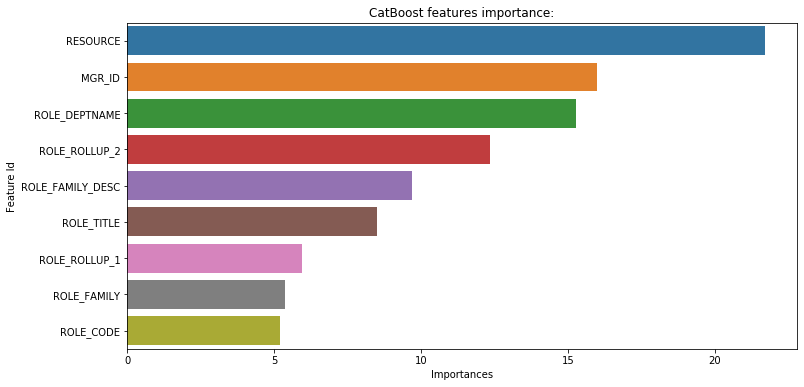

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6));
sns.barplot(x="Importances", y="Feature Id", data=feature_imp, orient='V');
plt.title('CatBoost features importance:');

In [ ]:
predictions=catmodel.predict_proba(X_test)

In [ ]:
predictions 

array([[0.29867231, 0.70132769],
       [0.01846929, 0.98153071],
       [0.00779143, 0.99220857],
       ...,
       [0.00983214, 0.99016786],
       [0.06395067, 0.93604933],
       [0.01295259, 0.98704741]])

In [ ]:
predictions=catmodel.predict(X_test)
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
catmodel.score(X_valid, y_valid)

0.9564262175027463

In [ ]:
traindf['ACTION'].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

<br>

**IMPORTANT**

Note that our target column (**ACTION**) contains **30872** 1s and only **1897** 0s. This is an indication of data imbalance. You can deal with this and use the same steps above to build the algorithm.

If you are not familiar with how to deal with **data imbalance**, watch the **Credit Card Fraud Detection** project video to get to know how to solve this.